In [1]:
#вы работаете в приложении по доставке готовых продуктов. 
#К вам пришел коллега с результатами двух тестов:
#В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, 
#либо новые квадратные 
#Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый
#Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. 
#Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

#Задания:
#1. Проверьте, являются ли дисперсии внутри групп гомогенными.
#2. Проведите тест на нормальность распределения.
#3. Сравните средние в представленных группах.
#4. Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
#5. Примите решение: какие картинки в итоге будем использовать?
# для второго теста:
#1. Визуализируйте распределение events для контрольной и тестовой групп. 
#2. Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 
#3. Выберите формулу для модели, проведите тест.

In [107]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
import pingouin as pg
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
photo_df = pd.read_csv('5_task_1.csv')
photo_df.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [8]:
A = photo_df.query('group == "A"').events
B = photo_df.query('group == "B"').events
C = photo_df.query('group == "C"').events

In [9]:
#1. Проверьте, являются ли дисперсии внутри групп гомогенными.
pg.homoscedasticity(data = photo_df, dv = 'events', group = 'group')

,W,pval,equal_var
levene,2.26226,0.104133,True


In [ ]:
#p-value > 0.05, не отклоняем нулевую гипотезу. Дисперсии гомогенны

In [ ]:
#Также убедитесь, что данные распределены нормально.
#Дополнительно: сравните  результат с qq-графиками.

In [10]:
pg.normality(data = photo_df, dv = 'events', group = 'group', method = 'normaltest')

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


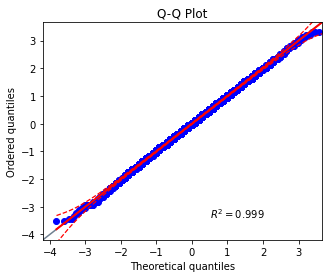

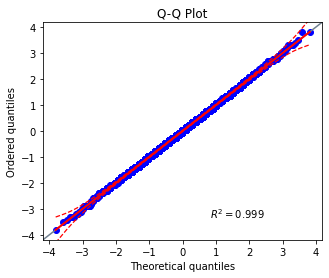

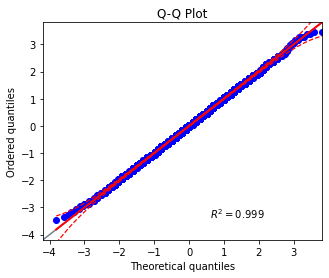

In [12]:
pg.qqplot(A)
pg.qqplot(B)
pg.qqplot(C)

In [ ]:
#3. Сравните средние в представленных группах.

In [14]:
pg.anova(data = photo_df, dv = 'events', between = 'group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [ ]:
#Для сравнения средних я использую ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ.
#Значение статистики равно 2886, а р-уровень значимости составил 0.

In [ ]:
#Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
#Дополнительно: попробуйте другие варианты поправок на множественные сравнения через pingouin. 
#Дают ли они те же выводы, что и Тьюки?

In [15]:
pg.pairwise_tukey(data = photo_df, dv = 'events', between = 'group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


In [ ]:
# Между всеми группами есть статистически значимые различия.

In [17]:
#Проверим теперь с поправкой Холма
pg.pairwise_ttests(data = photo_df, dv = 'events', between = 'group', padjust = 'holm')

/opt/tljh/user/lib/python3.7/site-packages/pingouin/bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,group,A,B,False,True,-57.011134,19998.0,two-sided,0.000000e+00,0.000000e+00,holm,inf,-0.806229
1,group,A,C,False,True,14.886135,19998.0,two-sided,7.500262e-50,7.500262e-50,holm,1.054e+46,0.210514
2,group,B,C,False,True,72.420220,19998.0,two-sided,0.000000e+00,0.000000e+00,holm,inf,1.024138


In [ ]:
#Вывод прежний: между всеми группами есть статистически значимые различия.

In [ ]:
#5. Примите решение: какие картинки в итоге будем использовать?

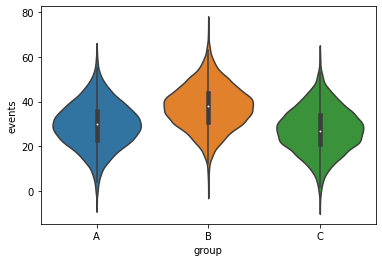

In [18]:
sns.violinplot(x = 'group', y = 'events', data = photo_df)

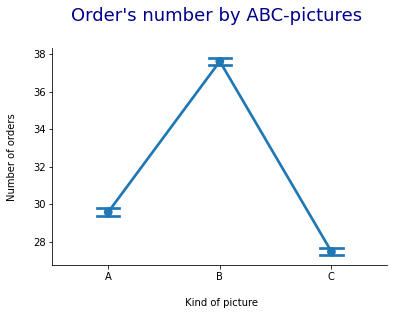

In [40]:
sns.pointplot(x = 'group', y = 'events', data = photo_df, capsize = 0.2)
plt.title('Order\'s number by ABC-pictures \n', fontsize = 18, color = 'darkblue')
plt.xlabel('\n Kind of picture')
plt.ylabel('Number of orders\n')
sns.despine()

In [ ]:
# Будем использовать квадратные картинки (тип В)

In [ ]:
#Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, 
#с разбивкой по сегменту клиента.

In [42]:
button_df = pd.read_csv('5_task_2.csv')
button_df.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [ ]:
# в данном случае используем многофакторный дисперсионный анализ

In [ ]:
#1. Визуализируйте распределение events для контрольной и тестовой групп. 

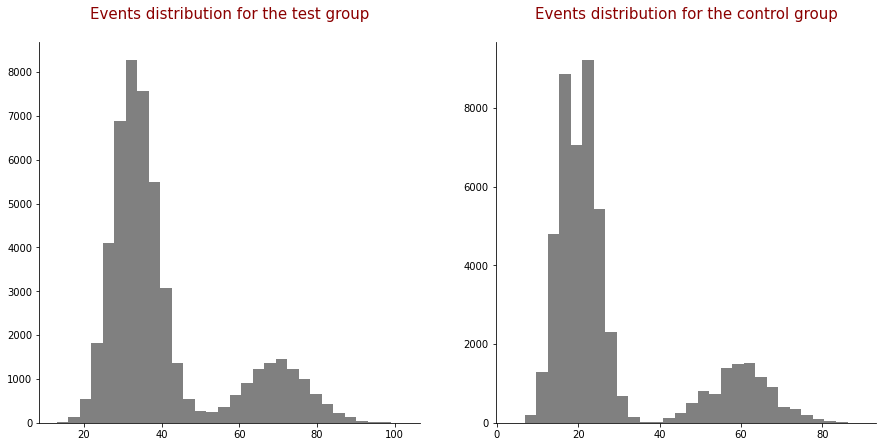

In [76]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 7))
ax1.hist(button_df.query('group == "test"').events, bins = 30, color='grey')
ax1.set_title('Events distribution for the test group\n', fontsize = 15, color = 'darkred')
sns.despine()

ax2.hist(button_df.query('group == "control"').events, bins = 30, color='grey')
ax2.set_title('Events distribution for the control group\n', fontsize = 15, color = 'darkred')
sns.despine()


In [ ]:
#2. Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

In [86]:
button_df.query('group == "test"').groupby('segment').events.describe()

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
high,10000.0,69.938500,8.403974,40.0,64.0,70.0,76.0,102.0
low,40000.0,33.025925,5.720845,13.0,29.0,33.0,37.0,59.0


In [84]:
button_df.query('group == "control"').groupby('segment').events.describe()

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
high,10000.0,59.970800,7.805347,31.0,55.0,60.0,65.0,89.0
low,40000.0,20.031575,4.473576,4.0,17.0,20.0,23.0,41.0


In [ ]:
#3. Выберите формулу для модели, проведите тест.
#Затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

In [ ]:
#В данном случае для последующих сравнений между группами можно проделать следующую операцию: 
#соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey.

In [110]:
button_df = button_df.assign(combination = button_df.group + ' / ' + button_df.segment)
button_df.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test / high
1,96723,test,high,71.0,test / high
2,68719,test,high,80.0,test / high
3,50399,test,high,80.0,test / high
4,95613,test,high,78.0,test / high


In [94]:
#мы хотим проверить эффект нескольких переменных – group и segment – на events, с взаимодействием факторов
pg.anova(data = button_df, dv = 'events', between = ['group', 'segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [95]:
pg.pairwise_tukey(data = button_df, dv = 'events', between = 'combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control / high,control / low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control / high,test / high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control / high,test / low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control / low,test / high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control / low,test / low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test / high,test / low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


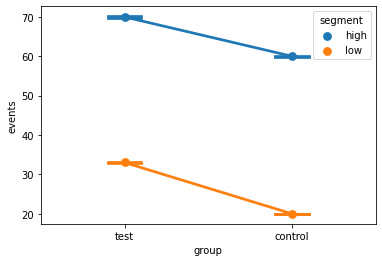

In [96]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = button_df, capsize = 0.2)

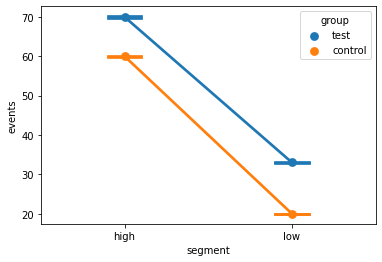

In [99]:
sns.pointplot(x = 'segment', y = 'events', hue = 'group', data = button_df, capsize = 0.2)

In [ ]:
# Вывод: Фактор group оказался ЗНАЧИМЫМ, фактор segment – ЗНАЧИМЫМ, их взаимодействие – ЗНАЧИМО.
# Судя по графику, для всех групп среднее значение events УВЕЛИЧИЛОСЬ, поэтому решение: ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ.